# Importing Libraries

In [1]:
# Importing Libraries for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind
from scipy.stats import yeojohnson

# libraries for feature engineering
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

# libraries for dataset splits
from sklearn.model_selection import train_test_split

# libraries for machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# libraries for machine learning model output 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# model dump
import joblib

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [2]:
df = pd.read_csv('df_transformed.csv')
df.head(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:APQ,NHR,HNR,RPDE,DFA,spread2,D2,PPE,status
0,4.795724,5.064505,4.330694,0.000061,0.000014,0.000031,0.000123,0.000883,0.000489,3.092541,0.172045,0.664690,0.071013,5.296635,0.081028,1.0
1,4.815431,5.008299,4.743357,0.000094,0.000022,0.000048,0.000194,0.001908,0.000372,2.999973,0.210093,0.671615,0.112621,6.184448,0.135921,1.0
2,4.767986,4.883642,4.723442,0.000110,0.000030,0.000061,0.000267,0.001289,0.000171,3.075052,0.184810,0.681100,0.096829,5.486177,0.110645,1.0


In [3]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:APQ', 'NHR', 'HNR', 'RPDE',
       'DFA', 'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

# Predictive Modelling

## 1. Splitting Data into Features and Target

In [4]:
# Splitting the data into dependant and independant variables
x = df.drop(['status'], axis=1)
y = df['status']

In [5]:
# splitting the dependant and independant variables into test and train variables
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [6]:
print("Training Variable")
print(x_train.shape)
print(y_train.shape)

print("Testing Variable")
print(x_test.shape)
print(y_test.shape)

Training Variable
(224, 15)
(224,)
Testing Variable
(56, 15)
(56,)


In [7]:
# Define a list of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multi-layer Perceptron': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier()
    }

# Train each classifier and evaluate its accuracy
results = {}
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Select the classifier with the highest accuracy
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("\n---------Results--------------\n")
for name, accuracy in results.items():
    print(f"{name}: Accuracy - {accuracy}")

print("\n---------Best Algorithm and Accuracy--------------")
print(f"\nBest Classifier: {best_classifier} with Accuracy - {best_accuracy}")


---------Results--------------

Random Forest: Accuracy - 0.9821428571428571
K-Nearest Neighbors: Accuracy - 0.875
Support Vector Machine: Accuracy - 0.625
Logistic Regression: Accuracy - 0.7321428571428571
Gaussian Naive Bayes: Accuracy - 0.625
Decision Tree: Accuracy - 0.9464285714285714
Gradient Boosting: Accuracy - 0.9821428571428571
Multi-layer Perceptron: Accuracy - 0.7321428571428571
AdaBoost: Accuracy - 0.9821428571428571

---------Best Algorithm and Accuracy--------------

Best Classifier: Random Forest with Accuracy - 0.9821428571428571


## 2. Selecting the best accuracy algorithm - Random Forest Classifier

### Selecting the n_estimator with highest accuracy

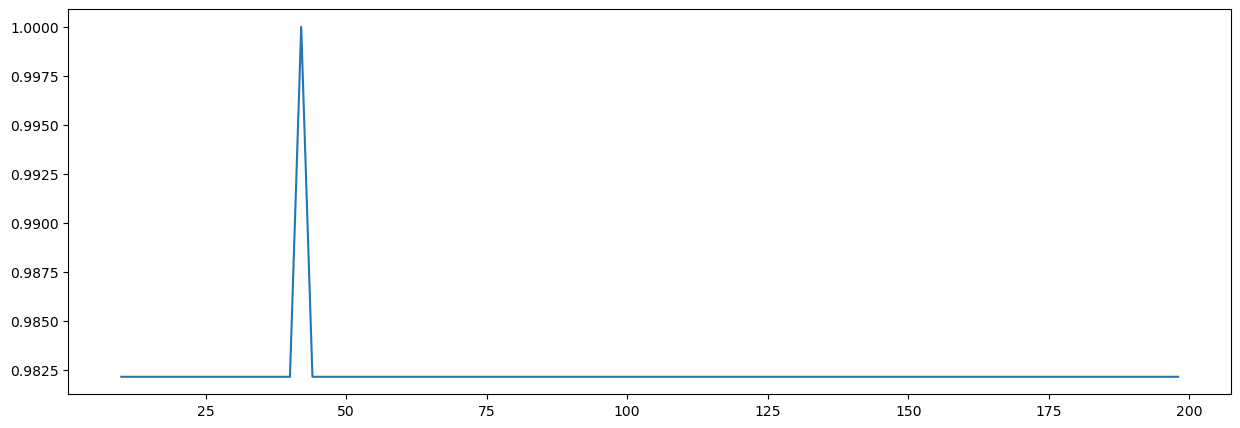

In [8]:
scores = []
for i in range(10, 200, 2):
    
    model = RandomForestClassifier(n_estimators=i, bootstrap=True,)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test,y_test))

# Set the size of the figure
plt.figure(figsize=(15, 5))
plt.plot(range(10, 200, 2), scores)

### Score of classifier increases with number of estimators till 0.99 for estimators 15 estimators and then stabilizes

## 3. Checking the optimum number of n_estimators

In [9]:
# find the n_estimator value for which score is highest
high_score_index = scores.index(max(scores))
estimators = np.arange(10, 200, 2)
n_est = estimators[high_score_index]

print(f"Number of estimators for which score is maximum - {n_est}")

Number of estimators for which score is maximum - 42


In [10]:
# Declaring the Random forest algorithm
model = RandomForestClassifier(n_estimators=n_est, bootstrap=True,)

## 4. Training the Model

In [11]:
# Training the model on training dataset
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=42)

## 5. Results of Model Output

In [12]:
# Prediciting the output for test dataset
y_pred = model.predict(x_test)

In [13]:
# Classification report for random forest classifier
classification_reports = classification_report(y_test, y_pred)
print(classification_reports)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        26
         1.0       1.00      0.97      0.98        30

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



In [14]:
# Confusion matrix 
res = confusion_matrix(y_test, y_pred)
print(res)

[[26  0]
 [ 1 29]]


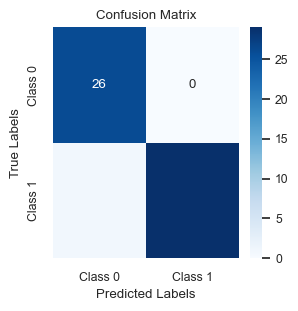

In [15]:
# Define class labels
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.heatmap(res, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [16]:
# Score for model
model.score(x_test, y_test)

0.9821428571428571

## 6. Hyperparameter Tuning

### 6.1 Finding the Optimum Parameters with Randomized Search CV

In [17]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,50,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# parameter dictionary for RandomizedSearchCV 
params = { 'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'criterion':['entropy','gini']}

rf_randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=5, verbose=2)
rf_randomcv.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=42),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   verbose=2)

### Get the best hyperparameters from RandomizedSearchCV

In [18]:
best_params_random = rf_randomcv.best_params_
print(best_params_random)

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'entropy'}


### 6.2 Finding the Optimum Parameters with Grid Search CV

In [19]:
# Get the best hyperparameters from RandomizedSearchCV
best_params_random = rf_randomcv.best_params_

# Define hyperparameters to search (for GridSearchCV), using the best parameters from RandomizedSearchCV
param_grid = {
    'max_depth': [best_params_random['max_depth'],best_params_random['max_depth']+1, best_params_random['max_depth']+2, best_params_random['max_depth']+3, best_params_random['max_depth']-1, best_params_random['max_depth']-2, best_params_random['max_depth']-3],
    'min_samples_split': [best_params_random['min_samples_split'], best_params_random['min_samples_split']-1, best_params_random['min_samples_split']+1, best_params_random['min_samples_split']-2, best_params_random['min_samples_split']+2],
    'min_samples_leaf': [best_params_random['min_samples_leaf'], best_params_random['min_samples_leaf']-1, best_params_random['min_samples_leaf']+1, best_params_random['min_samples_leaf']-2, best_params_random['min_samples_leaf']+2],
    'criterion': ['entropy']
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params_grid = grid_search.best_params_

# Evaluate the model with the best hyperparameters from GridSearchCV
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Best Hyperparameters from RandomizedSearchCV:", best_params_random)
print("Best Hyperparameters from GridSearchCV:", best_params_grid)
print("Accuracy with Best Hyperparameters from GridSearchCV:", accuracy)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=

In [20]:
# print the best parameters for model after grid search cv hypermarameter tuning
print(best_params_grid)

{'criterion': 'entropy', 'max_depth': 51, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [21]:
# Declaring the Random forest algorithm
model_final = RandomForestClassifier(n_estimators = 32, 
                               criterion = best_params_grid['criterion'],
                               max_depth = best_params_grid['max_depth'],
                               min_samples_leaf = best_params_grid['min_samples_leaf'],
                               min_samples_split = best_params_grid['min_samples_split'],
                               bootstrap=True,)



In [22]:
# Prediciting the output for test dataset
y_pred = model.predict(x_test)

In [23]:
# Classification report for random forest classifier
classification_reports = classification_report(y_test, y_pred)
print(classification_reports)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        26
         1.0       1.00      0.97      0.98        30

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



In [24]:
# Confusion matrix 
res = confusion_matrix(y_test, y_pred)
print(res)

[[26  0]
 [ 1 29]]


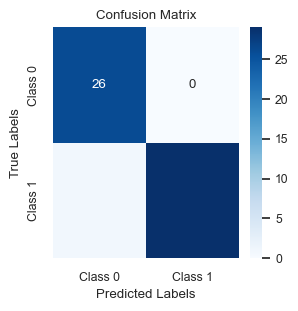

In [25]:
# Define class labels
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.heatmap(res, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [26]:
# Export the trained model
joblib.dump(model, 'parkinsons_model.pkl')

['parkinsons_model.pkl']